In [16]:
# Step 1: Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [23]:
# Step 2: Data Collection and Loading
data = pd.read_csv("Mall_Customers.csv")
data.head()
data.info()
data.columns
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [22]:
# Step 3: Data Cleaning
# Check for missing values
print(data.isnull().sum())
# There are no missing values in this dataset

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64


In [21]:
# Step 4: Exploratory Data Analysis (EDA)
# Basic statistics
print(data.describe())


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)  \
count  200.000000  200.000000          200.000000              200.000000   
mean   100.500000   38.850000           60.560000               50.200000   
std     57.879185   13.969007           26.264721               25.823522   
min      1.000000   18.000000           15.000000                1.000000   
25%     50.750000   28.750000           41.500000               34.750000   
50%    100.500000   36.000000           61.500000               50.000000   
75%    150.250000   49.000000           78.000000               73.000000   
max    200.000000   70.000000          137.000000               99.000000   

          Cluster  
count  200.000000  
mean     1.400000  
std      1.449311  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      3.000000  
max      4.000000  


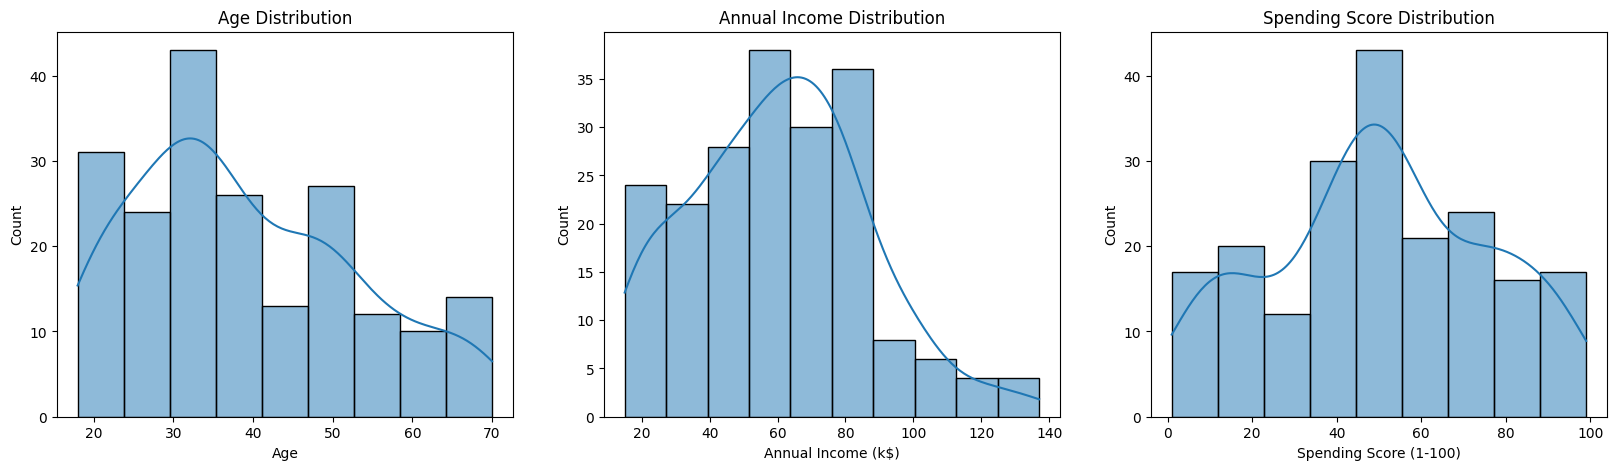

In [13]:
# Distribution of Age, Annual Income, and Spending Score
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')

plt.show()



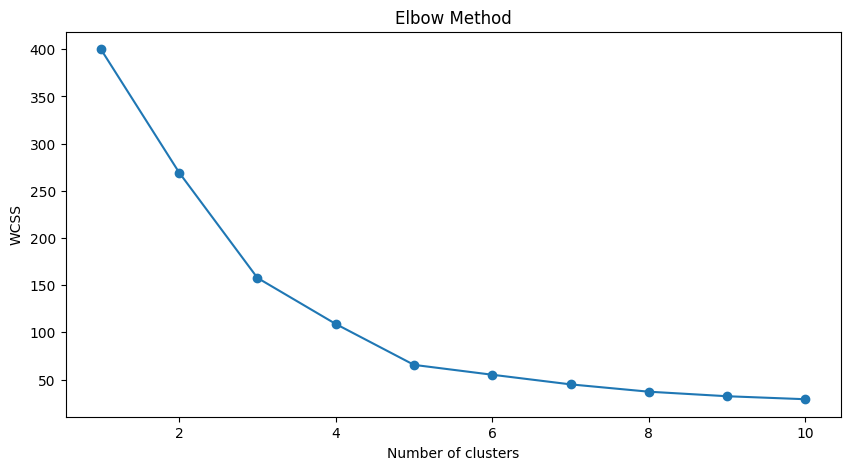

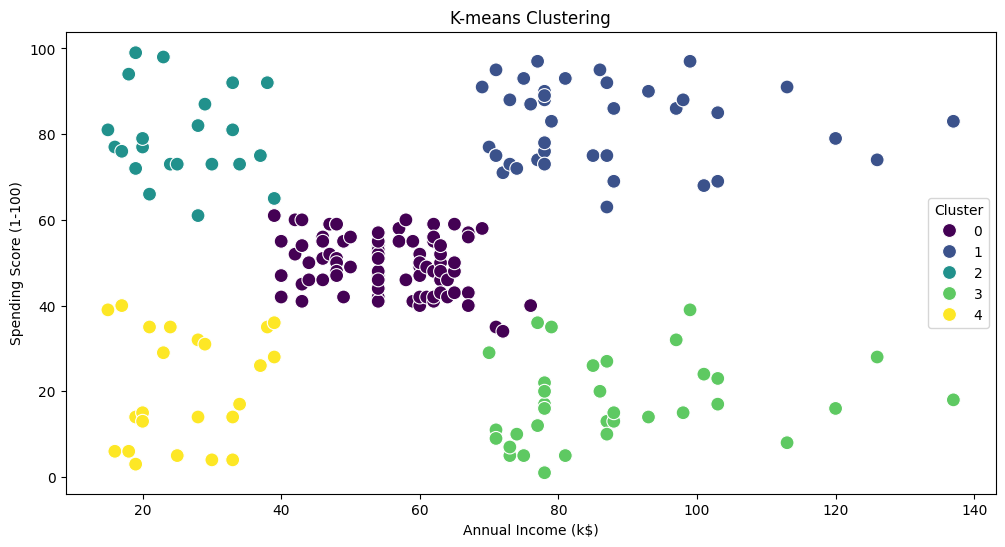

In [15]:
# Step 5: Clustering Algorithms

# K-means Clustering
# Select features for clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# From the elbow plot, choose the optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('K-means Clustering')
plt.show()

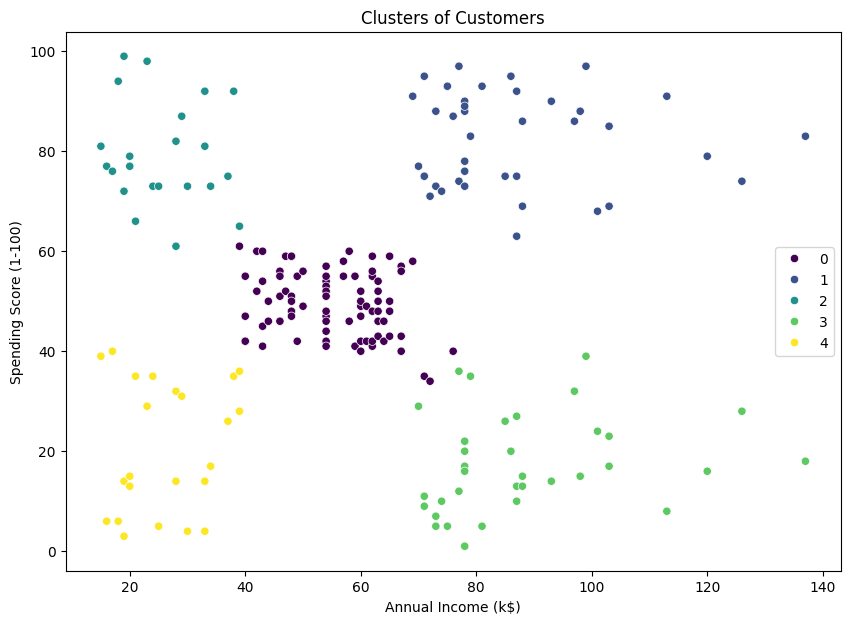

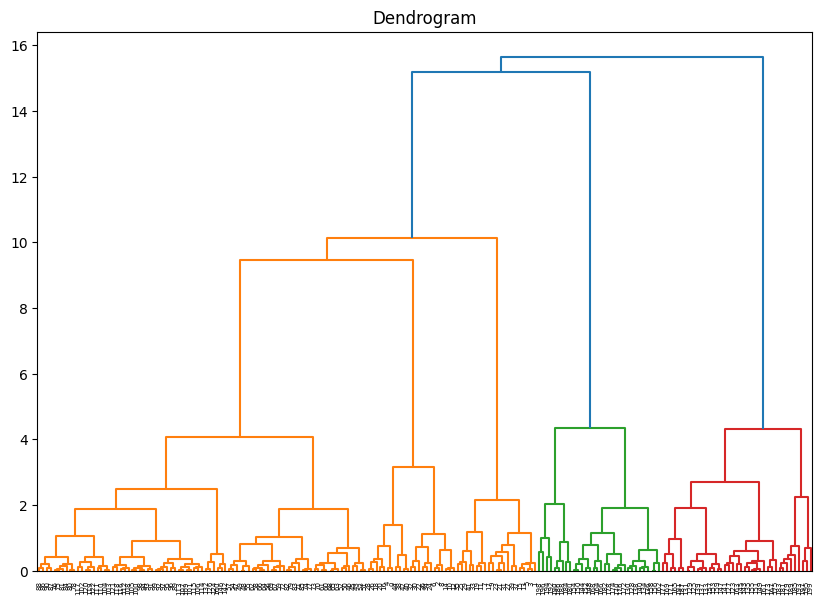

In [20]:
# Step 6: Data Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Hierarchical Clustering
linked = linkage(scaled_features, method='ward')

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()





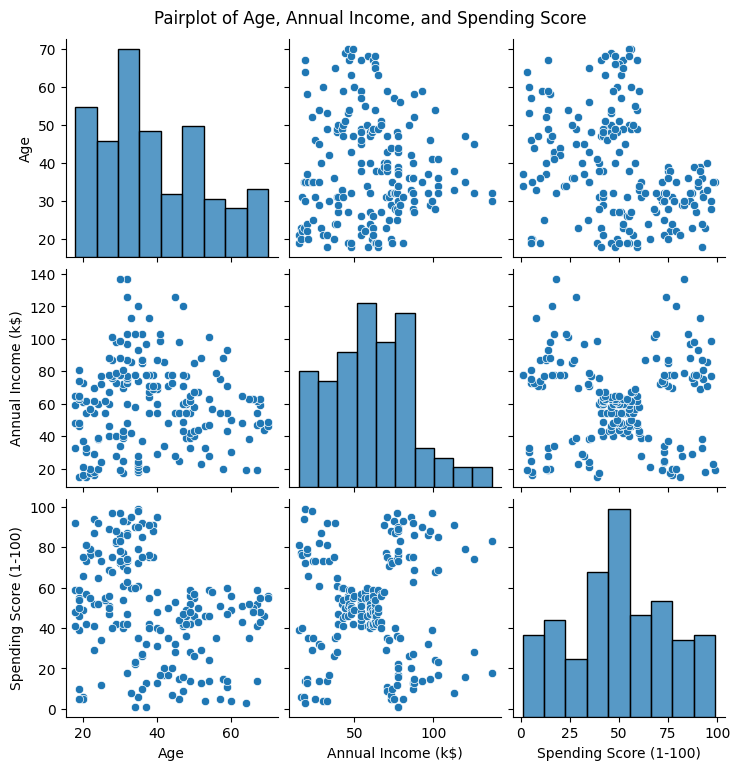

In [9]:
# Additional Seaborn visualizations
# Pairplot to visualize pairwise relationships in the dataset
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairplot of Age, Annual Income, and Spending Score', y=1.02)
plt.show()


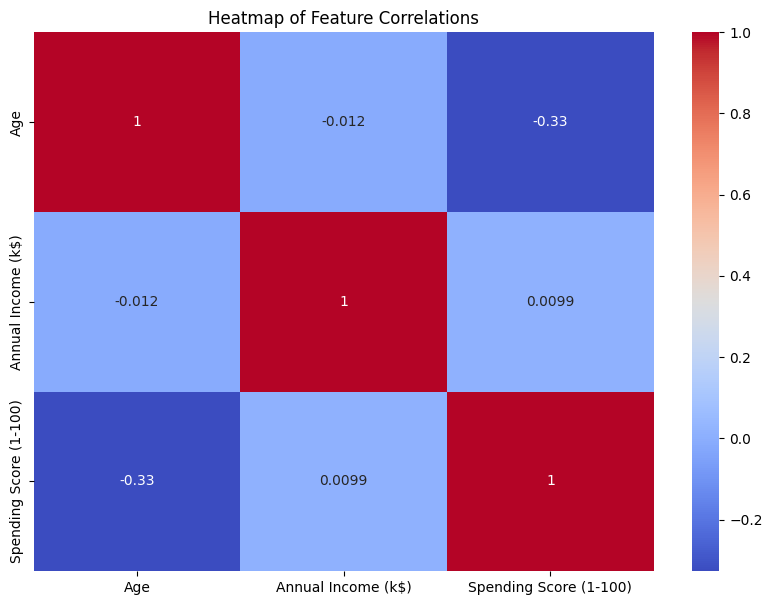

In [10]:
# Heatmap to visualize correlations between features
plt.figure(figsize=(10, 7))
sns.heatmap(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

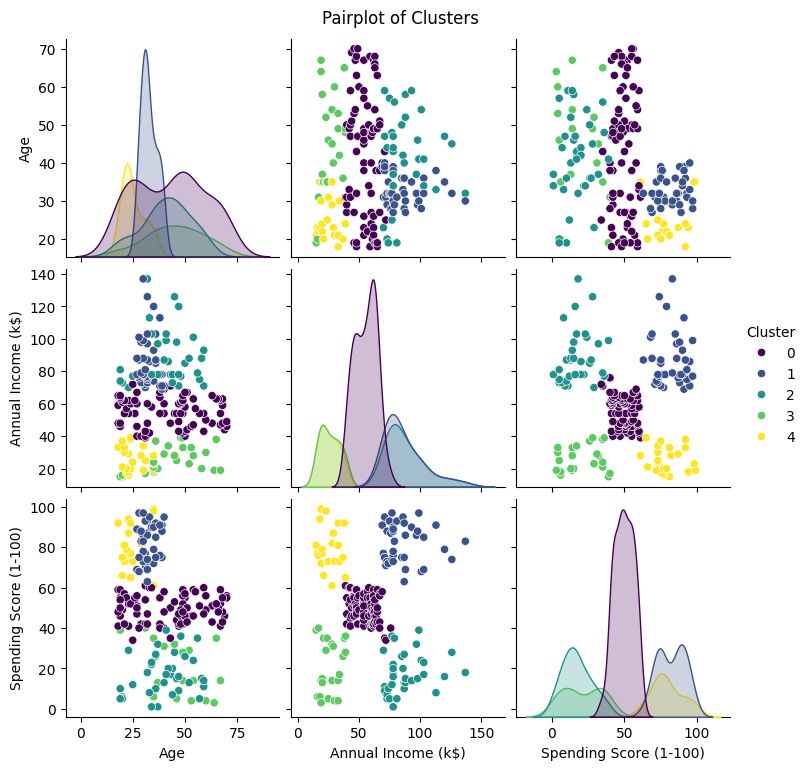

In [11]:
# Visualizing clusters with pairplot
sns.pairplot(data, hue='Cluster', palette='viridis', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.suptitle('Pairplot of Clusters', y=1.02)
plt.show()
